In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
from cvxpy import *

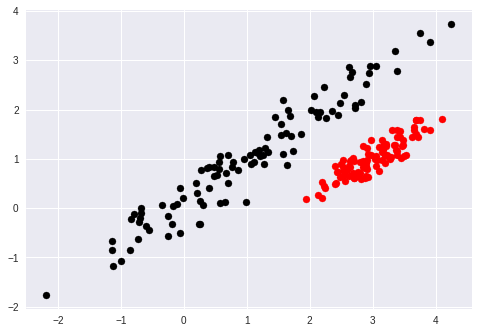

In [94]:
dmnsn = 2
m = 100
n = 100

x_center = [1,1]
y_center = [3,1]

np.random.seed(8)

orientation_x = np.random.rand(2,2)
orientation_y = np.random.rand(2,2)

rx = np.clip(np.random.randn(m,dmnsn),-2,2)
ry = np.clip(np.random.randn(n,dmnsn),-2,2)
x = x_center + np.dot(rx,orientation_x)
y = y_center + np.dot(ry,orientation_y)


plt.scatter(x[:,0],x[:,1],color='black')
plt.scatter(y[:,0],y[:,1],color='red')

In [0]:
w = Variable(dmnsn)

b = Variable()
t = Variable()

obj = Maximize(t)

x_constraints = [w.T * x[i] - b >= t for i in range(m)]
y_constraints = [w.T * y[i] - b <= -t for i in range(n)]


constraints = x_constraints + y_constraints +[norm(w,2)<=1]

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)


Problem Status: optimal


In [0]:
def plotClusters(x,y,w,b,t):
  d1_min = np.min([x[:,0],y[:,0]])
  d1_max = np.max([x[:,0],y[:,0]])
  
  d2_atD1min = (-w[0]*d1_min + b ) / w[1]
  d2_atD1max = (-w[0]*d1_max + b ) / w[1]
  sup_up_atD1min = (-w[0]*d1_min + b + t ) / w[1]
  sup_up_atD1max = (-w[0]*d1_max + b + t ) / w[1]
  sup_dn_atD1min = (-w[0]*d1_min + b - t ) / w[1]
  sup_dn_atD1max = (-w[0]*d1_max + b - t ) / w[1]
  
  plt.scatter(x[:,0],x[:,1],color='black')
  plt.scatter(y[:,0],y[:,1],color='red')
  
  plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')
  plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
  plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')
  plt.ylim([np.floor(np.min([x[:,1],y[:,1]])),np.ceil(np.max([x[:,1],y[:,1]]))])


  

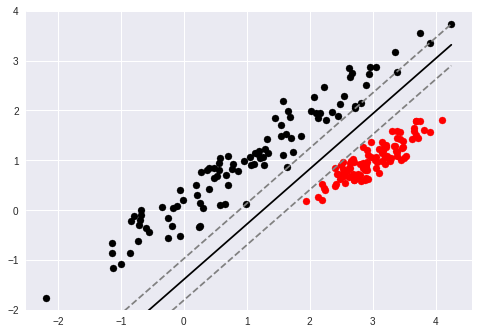

In [95]:
# if type(w) == cvxpy.expressions.variable.Variable :
#   w = w.value
#   b = b.value
#   t = t.value

plotClusters(x,y,w,b,t)